# Dataset Introduction

Using the housing dataset... this section had a purpose when I was using a custom dataset, however I've switched it to the housing dataset. 

# Imports

In [50]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *
from umap.umap_ import UMAP

# loading libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L # I got tired of typing keras.layers.dense every time for EC

# for vanilla ml pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning/Preparation

In [71]:
data = pd.read_csv('../datasets/assignment02_californiahousing.csv')
data.head() # there are some NaNs due to moving averages at the start & missing values, they will be dropped later

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
data.dropna(inplace = True)
data.reset_index(inplace = True)

In [26]:
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']
predictors = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]

preprocessor = make_column_transformer(
        (StandardScaler(), predictors),
        remainder='passthrough')
    


X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=3619)   


# EDA/Dataset Analysis

In [27]:
feats = data[[c for c in data.columns if c != "open"]]
correlation_matrix = feats.corr()
correlation_matrix

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
index,1.000000,0.071673,-0.181132,0.042471,-0.011169,0.024880,0.005545,0.081062,-0.113254,0.072086
MedInc,0.071673,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.181132,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.042471,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.011169,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.024880,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.005545,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,0.081062,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.113254,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.072086,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### UMAP (because why not)

this created some brain-looking image, but I'm not quite sure what I'm getting from this - probably due to lots of points

In [ ]:
feats = data[[c for c in data.columns if c != "open"]]
reducer = UMAP()
embedding = reducer.fit_transform(feats)

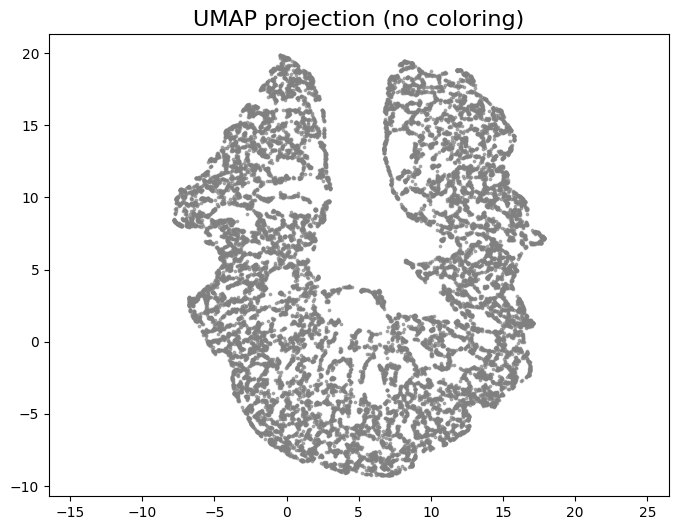

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=3,          # small dots
    alpha=0.6,    # transparency since there are lots of points
    color="gray" 
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection (no coloring)', fontsize=16)
plt.show()

# Building the Model

In [ ]:
model = keras.Sequential([ # trying a slightly larger network due to the larger dataset and more complex feature space
    keras.layers.Dense(512, activation='relu', input_shape=(9,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['mae'])

history_no_reg = model.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test))

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 151554.1875 - mae: 215.1601 - val_loss: 241.5838 - val_mae: 13.0771
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 237.2701 - mae: 9.7674 - val_loss: 119.7043 - val_mae: 9.0933
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.3082 - mae: 3.9977 - val_loss: 116.1140 - val_mae: 8.9560
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.7755 - mae: 5.1522 - val_loss: 89.8270 - val_mae: 8.5934
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3502 - mae: 3.1575 - val_loss: 10.3133 - val_mae: 2.5663
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4830 - mae: 3.5218 - val_loss: 218.6779 - val_mae: 12.4370
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.3020 - mae: 5.1414 - val_loss: 3.6982 - val_mae: 1.5330
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.7147 - mae: 4.1843 - val_loss: 29.3761 - val_mae: 4.3974
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

## L2 Reg

In [33]:
model = keras.Sequential([ # trying a slightly larger network due to the larger dataset and more complex feature space
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(9,)),
    keras.layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['mae'])

history_l2_reg = model.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test))

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 150194.9062 - mae: 215.1030 - val_loss: 34.2882 - val_mae: 5.3646
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.2833 - mae: 5.1268 - val_loss: 3.2561 - val_mae: 1.3494
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174.4088 - mae: 7.7581 - val_loss: 16.5258 - val_mae: 3.7220
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1676 - mae: 4.0684 - val_loss: 179.5377 - val_mae: 12.0139
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.9892 - mae: 5.5447 - val_loss: 15.5981 - val_mae: 3.1574
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1568 - mae: 2.1067 - val_loss: 2.8277 - val_mae: 1.2931
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.3749 - mae: 2.8617 - val_loss: 2.4291 - val_mae: 1.1806
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3340 - mae: 1.1316 - val_loss: 2.3633 - val_mae: 1.1228
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

## Dropout

In [34]:
model = keras.Sequential([ # trying a slightly larger network due to the larger dataset and more complex feature space
    keras.layers.Dense(512, activation='relu', input_shape=(9,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['mae'])

history_drop_reg = model.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test))

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 296886.6875 - mae: 289.5893 - val_loss: 158.5369 - val_mae: 11.3263
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2307.7480 - mae: 32.5049 - val_loss: 7.0843 - val_mae: 2.3747
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 488.8587 - mae: 14.0582 - val_loss: 5.6805 - val_mae: 2.0712
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 160.1125 - mae: 6.6949 - val_loss: 5.4909 - val_mae: 2.0249
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97.3797 - mae: 4.8755 - val_loss: 5.2164 - val_mae: 1.9560
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.5178 - mae: 3.5372 - val_loss: 4.9461 - val_mae: 1.8857
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.5590 - mae: 2.2100 - val_loss: 4.6563 - val_mae: 1.8072
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7407 - mae: 1.9045 - val_loss: 4.3737 - val_mae: 1.7275
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

## L2 & Dropout

In [35]:
model = keras.Sequential([ # trying a slightly larger network due to the larger dataset and more complex feature space
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(9,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['mae'])

history_l2_drop_reg = model.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test))

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 313152.4688 - mae: 306.9174 - val_loss: 332.4413 - val_mae: 16.2338
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1166.0315 - mae: 21.9041 - val_loss: 6.2466 - val_mae: 2.0887
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.0676 - mae: 2.2903 - val_loss: 6.1320 - val_mae: 2.0610
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2917 - mae: 2.0551 - val_loss: 6.0193 - val_mae: 2.0334
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9593 - mae: 2.0045 - val_loss: 5.8690 - val_mae: 1.9961
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8637 - mae: 1.9785 - val_loss: 5.6968 - val_mae: 1.9525
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5260 - mae: 1.9155 - val_loss: 5.4976 - val_mae: 1.9008
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3110 - mae: 1.8646 - val_loss: 5.2648 - val_mae: 1.8386
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss:

## Plotting Performances

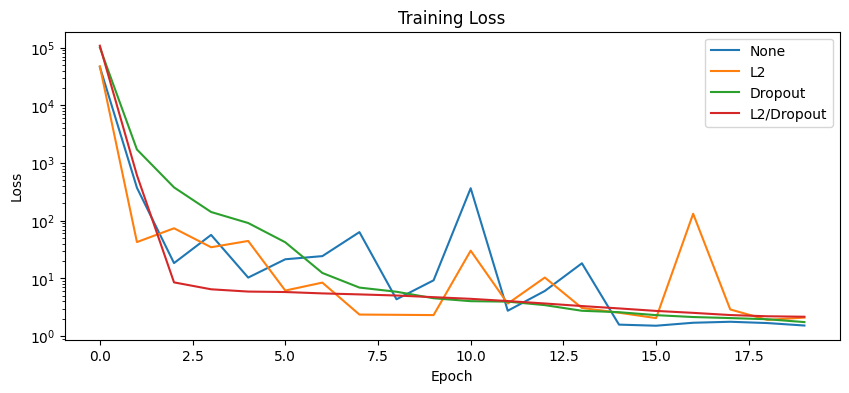

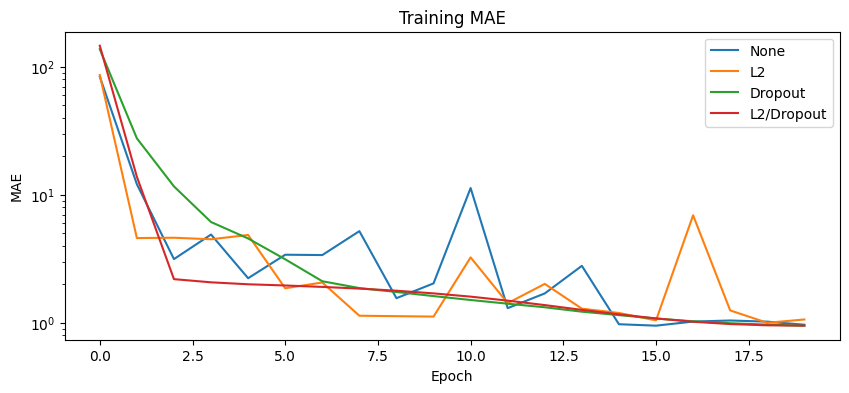

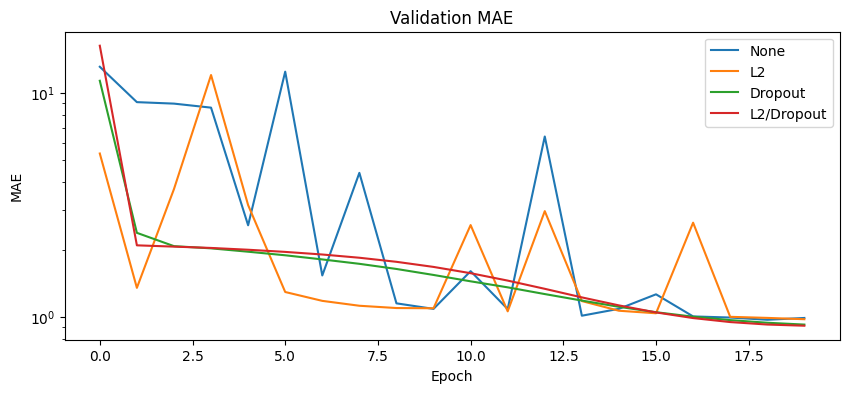

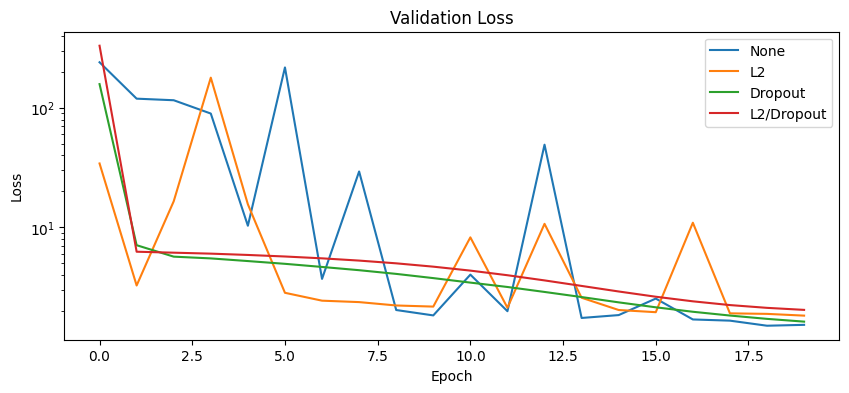

In [73]:
model_history = {"None":history_no_reg.history,
                 "L2":history_l2_reg.history,
                 "Dropout":history_drop_reg.history,
                 "L2/Dropout":history_l2_drop_reg.history}

# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log') # log scale for better visualization. Without this, they all just collapsed to flat lines and it was impossible to distinguish
plt.legend()
plt.show()

# Training MAE
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['mae'], label=f'{name}')
plt.title("Training MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.yscale('log')
plt.legend()
plt.show()

# Validation MAE
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_mae'], label=f'{name}')
plt.title("Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.yscale('log')
plt.legend()
plt.show()

# Validation Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_loss'], label=f'{name}')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend()
plt.show()

It seems apparent to me that L2/Dropout in conjunction seem to achieve optimal performance. It also seems like the model might benefit from early stopping, as performance seems to stagnate. 

## Early Stopping

In [38]:
model = keras.Sequential([ # trying a slightly larger network due to the larger dataset and more complex feature space
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(9,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['mae'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=2,
    restore_best_weights=True
)

history_l2_drop_es_reg = model.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test),
                           callbacks=[early_stopping])


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 240824.5156 - mae: 269.6393 - val_loss: 475.1732 - val_mae: 19.3377
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1129.1896 - mae: 21.2694 - val_loss: 6.1932 - val_mae: 2.0774
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7490 - mae: 2.3429 - val_loss: 6.0158 - val_mae: 2.0342
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0370 - mae: 2.0128 - val_loss: 5.8089 - val_mae: 1.9826
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7578 - mae: 1.9629 - val_loss: 5.5912 - val_mae: 1.9269
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4736 - mae: 1.8934 - val_loss: 5.3624 - val_mae: 1.8667
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2393 - mae: 1.8411 - val_loss: 5.1232 - val_mae: 1.8016
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9721 - mae: 1.7725 - val_loss: 4.8748 - val_mae: 1.7314
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss

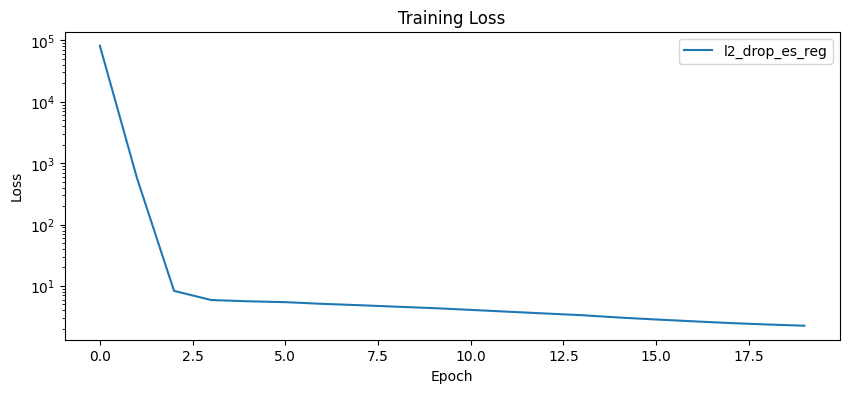

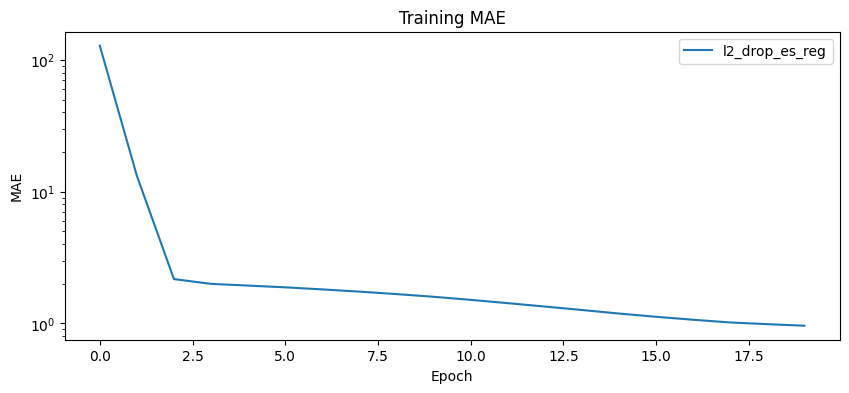

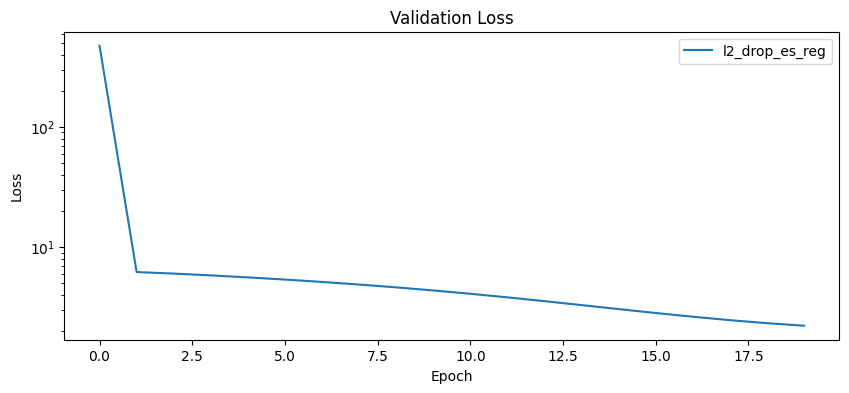

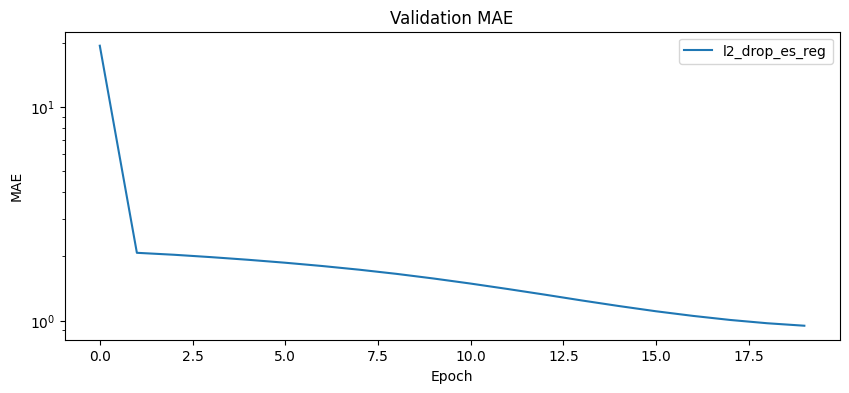

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(history_l2_drop_es_reg.history['loss'], label=f'l2_drop_es_reg')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log') # log scale for better visualization. Without this, they all just collapsed to flat lines and it was impossible to distinguish
plt.legend()
plt.show()

# Training MAE
plt.figure(figsize=(10, 4))
plt.plot(history_l2_drop_es_reg.history['mae'], label=f'l2_drop_es_reg')
plt.title("Training MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.yscale('log')
plt.legend()
plt.show()

# Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history_l2_drop_es_reg.history['val_loss'], label=f'l2_drop_es_reg')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend()
plt.show()

# Validation MAE
plt.figure(figsize=(10, 4))
plt.plot(history_l2_drop_es_reg.history['val_mae'], label=f'l2_drop_es_reg')
plt.title("Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.yscale('log')
plt.legend()
plt.show()

# Vanilla ML Pipeline

In [ ]:
lr = GradientBoostingRegressor()

pipe = Pipeline([("preprocessor", preprocessor),
                ("linearregression", lr)])

# model validation
kf = KFold(5, shuffle=True)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

print("Train MAEs:", mae["train"])
print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

Train MSEs: [0.2591771868331233, 0.23815281293291213, 0.22579218496607492, 0.24445580706083866, 0.22636955002119324]
Test MSEs : [1.6385181922075052, 0.3938046063794335, 0.46593126187326284, 0.4586498529183736, 0.46384932669664924]
Train MSE : 0.23878950836282847
Test MSE  : 0.6841506480150448
Train MAEs: [0.35575411598938533, 0.3356433238317597, 0.323974416915259, 0.34410937648098133, 0.3253791648863723]
Test MAEs : [1.1780296369166465, 0.4753804069797488, 0.4875353088802947, 0.5108532722071403, 0.5086770919982166]
Train MAE : 0.3369720796207515
Test MAE  : 0.6320951433964094


# Extra Credit

In [57]:
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = keras.datasets.fashion_mnist.load_data()
X_train_fashion = X_train_fashion.reshape(-1, 28*28).astype('float32') / 255.0
X_test_fashion = X_test_fashion.reshape(-1, 28*28).astype('float32') / 255.0

# Convert y labels to one-hot encoded vectors
y_train_fashion = keras.utils.to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = keras.utils.to_categorical(y_test_fashion, num_classes=10)
len(X_train_fashion), len(X_test_fashion)

(60000, 10000)

In [66]:
model = keras.Sequential([ 
    keras.layers.Dense(128,activation='relu', input_shape=(784,)), 
    keras.layers.Dropout(0.30), 
    keras.layers.Dense(128,activation='relu'), 
    keras.layers.Dropout(0.30), 
    keras.layers.Dense(64, activation='linear'), 
    keras.layers.Dense(10,activation='softmax') ]) 

optimizer = keras.optimizers.Adam(learning_rate=0.003) 

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy']) 
# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_loss', 
#     patience=5,
#     restore_best_weights=True
# )
model.fit(X_train_fashion, y_train_fashion, 
          epochs=24, verbose=1, batch_size=64, 
          validation_data=(X_test_fashion, y_test_fashion),
          # callbacks=[early_stopping] 
          )

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7097 - loss: 0.7918 - val_accuracy: 0.8064 - val_loss: 0.5044
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8127 - loss: 0.5282 - val_accuracy: 0.8330 - val_loss: 0.4657
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8281 - loss: 0.4830 - val_accuracy: 0.8495 - val_loss: 0.4130
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8352 - loss: 0.4587 - val_accuracy: 0.8390 - val_loss: 0.4360
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8335 - loss: 0.4604 - val_accuracy: 0.8566 - val_loss: 0.4067
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8455 - loss: 0.4279 - val_accuracy: 0.8548 - val_loss: 0.4113
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8463 - loss: 0.4286 - val_accuracy: 0.8460 - val_loss: 0.4288
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8473 - loss: 0.4243 - val_accuracy: 0.

In [74]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,696 (1.44 MB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,798 (983.59 KB)